<a href="https://colab.research.google.com/github/zmathes1/Intro-to-Machine-Learning/blob/main/Assignement3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Zachary Matheson
801095035
Assignment 3
3-29-2024

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer


Problem 1a

In [37]:
breast = load_breast_cancer()
X = breast.data
print(X.shape)
Y = breast.target
breast_input = pd.DataFrame(X)
breast_input.head()


(569, 30)


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [38]:
# Convert y1 to string type if it's not already
y = Y.astype(str)

# Replacing the numbers with Benign and Malignant diagnoses
y[y == 0] = 'Benign'   # Replace 0 with 'Benign'
y[y == 1] = 'Malignant'   # Replace 1 with 'Malignant'


# Split into training and validation sets
x1_train, x1_test, y1_train, y1_test = train_test_split(X, Y, train_size = 0.8, test_size = 0.2, random_state = 0)

# Scale the data using standardization
sc_x1 = StandardScaler()
x1_train = sc_x1.fit_transform(x1_train)
x1_test = sc_x1.transform(x1_test)


In [39]:
def perform_logistic_regression(x_train, y_train, x_test, y_test):
    """
    Performs logistic regression, making predictions and creating a confusion matrix.
    Also prints the accuracy, precision, recall, and F1 score.

    Parameters:
    x_train : The input data from the training set
    y_train : The output data from the training set
    x_test : The input data from the test set
    y_test : The output data from the test set

    Returns:
    cnf_matrix : A 2D array containing true negative, false positive, false negative, and true positive (in that order)
    """
    classifier = LogisticRegression(random_state=0)
    classifier.fit(x_train, y_train)

    # Make predictions
    y_pred = classifier.predict(x_test)

    # Find confusion matrix
    cnf_matrix = confusion_matrix(y_test, y_pred)
    cnf_matrix

    # Find accuracy, precision, and recall
    print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
    print("Precision:", metrics.precision_score(y_test, y_pred))
    print("Recall:", metrics.recall_score(y_test, y_pred))
    print("F1 Score:", metrics.f1_score(y_test, y_pred))

    return cnf_matrix



In [40]:
def plot_confusion_matrix(confusion_matrix, neg_label, pos_label):
    """
    Plots the confusion matrix.

    Parameters:
    confusion_matrix: The 4 values for true negative, false positive, false negative, and true positive (in that order)
    """
    # Visualize the confusion matrix using a heatmap
    class_names=[neg_label, pos_label] # Name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks)
    plt.yticks(tick_marks)

    # Create heatmap
    sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    ax.set_xticklabels(class_names)
    ax.set_yticklabels(class_names)
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')


Accuracy: 0.9649122807017544
Precision: 0.9701492537313433
Recall: 0.9701492537313433
F1 Score: 0.9701492537313433


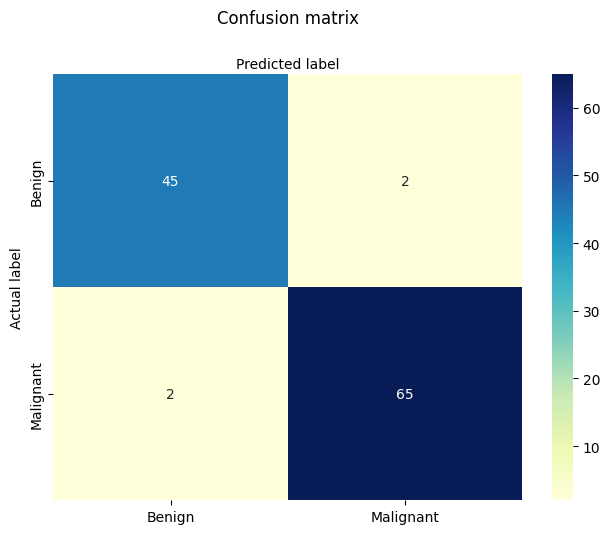

In [41]:
# Perform logistic regression and return confusion matrix
confusion_matrix_1a = perform_logistic_regression(x1_train, y1_train, x1_test, y1_test)
# Plot the confusion matrix
plot_confusion_matrix(confusion_matrix=confusion_matrix_1a, neg_label='Benign', pos_label='Malignant')

Problem 1b

In [42]:
# Adding a parameters penalty
C = [20, 10, 1, .1, .01]
x1b_train =  x1_train
x1b_test = x1_test

# Exploring different parameter penalties
for c in C:
    clf = LogisticRegression(penalty='l1', C=c, solver='liblinear')
    clf.fit(x1b_train, y1_train)
    print('C:', c)
    print('Training accuracy:\t%5.4f' %clf.score(x1b_train, y1_train))
    print('Test accuracy:\t\t%5.4f' %clf.score(x1b_test, y1_test))
    print('')

C: 20
Training accuracy:	0.9890
Test accuracy:		0.9561

C: 10
Training accuracy:	0.9890
Test accuracy:		0.9474

C: 1
Training accuracy:	0.9890
Test accuracy:		0.9561

C: 0.1
Training accuracy:	0.9758
Test accuracy:		0.9737

C: 0.01
Training accuracy:	0.9275
Test accuracy:		0.9211



In [43]:
# Selecting the best penalty and making the regression with it
clf = LogisticRegression(penalty='l1', C=0.1, solver='liblinear')
clf.fit(x1b_train, y1_train)
y1b_pred = clf.predict(x1b_test)

# Find accuracy, precision, and recall
print("Accuracy:", metrics.accuracy_score(y1_test, y1b_pred))
print("Precision:", metrics.precision_score(y1_test, y1b_pred))
print("Recall:", metrics.recall_score(y1_test, y1b_pred))
print("F1 Score:", metrics.f1_score(y1_test, y1b_pred))

Accuracy: 0.9736842105263158
Precision: 0.9705882352941176
Recall: 0.9850746268656716
F1 Score: 0.9777777777777777


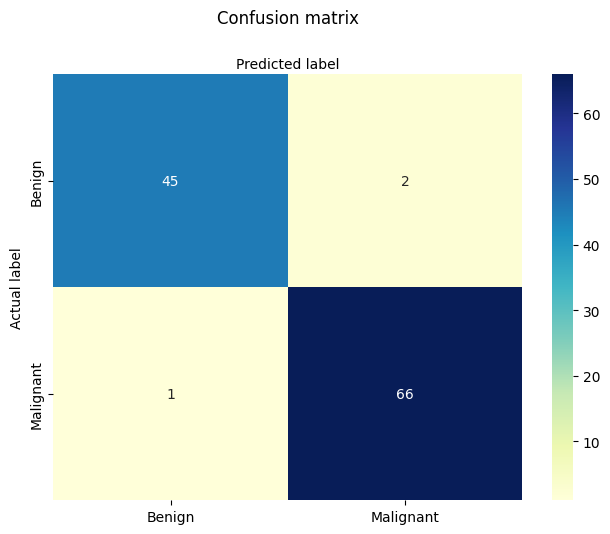

In [44]:
# Find confusion matrix
confusion_matrix_1b = confusion_matrix(y1_test, y1b_pred)

# Plot confusion matrix
plot_confusion_matrix(confusion_matrix=confusion_matrix_1b, neg_label='Benign', pos_label='Malignant')


Problem 2a

In [45]:
# Split into training and validation sets
x1_train, x1_test, y1_train, y1_test = train_test_split(X, Y, train_size = 0.8, test_size = 0.2, random_state = 0)

# Create the Gaussian classifier
classifier = GaussianNB()
classifier.fit(x1_train, y1_train)
y3_pred = classifier.predict(x1_test)

Problem 2b

In [46]:
# Find accuracy, precision, and recall
print("Accuracy:", metrics.accuracy_score(y1_test, y3_pred))
print("Precision:", metrics.precision_score(y1_test, y3_pred))
print("Recall:", metrics.recall_score(y1_test, y3_pred))
print("F1 Score:", metrics.f1_score(y1_test, y3_pred))

Accuracy: 0.9298245614035088
Precision: 0.9402985074626866
Recall: 0.9402985074626866
F1 Score: 0.9402985074626865


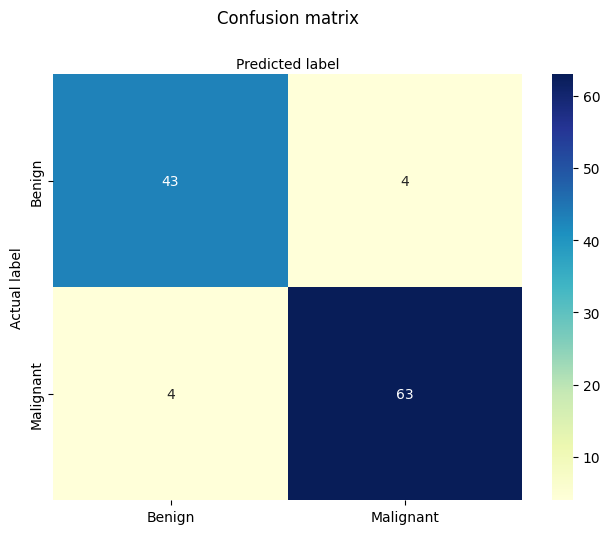

In [47]:
# Find confusion matrix
confusion_matrix_2a = confusion_matrix(y1_test, y3_pred)

# Plot confusion matrix
plot_confusion_matrix(confusion_matrix=confusion_matrix_2a, neg_label='Benign', pos_label='Malignant')

Problem 3a & 3b

In [48]:
# Perform standardization
X3 = StandardScaler().fit_transform(X)

K = 1:
Accuracy: 0.9035087719298246
Precision: 0.9242424242424242
Recall: 0.9104477611940298
F1 Score: 0.9172932330827067


K = 2:
Accuracy: 0.9298245614035088
Precision: 0.9682539682539683
Recall: 0.9104477611940298
F1 Score: 0.9384615384615386


K = 3:
Accuracy: 0.9122807017543859
Precision: 0.9384615384615385
Recall: 0.9104477611940298
F1 Score: 0.9242424242424243


K = 4:
Accuracy: 0.9473684210526315
Precision: 0.9552238805970149
Recall: 0.9552238805970149
F1 Score: 0.9552238805970149


K = 5:
Accuracy: 0.956140350877193
Precision: 0.9558823529411765
Recall: 0.9701492537313433
F1 Score: 0.962962962962963


K = 6:
Accuracy: 0.956140350877193
Precision: 0.9558823529411765
Recall: 0.9701492537313433
F1 Score: 0.962962962962963


K = 7:
Accuracy: 0.956140350877193
Precision: 0.9558823529411765
Recall: 0.9701492537313433
F1 Score: 0.962962962962963


K = 8:
Accuracy: 0.956140350877193
Precision: 0.9558823529411765
Recall: 0.9701492537313433
F1 Score: 0.962962962962963


K = 9:
Accuracy:

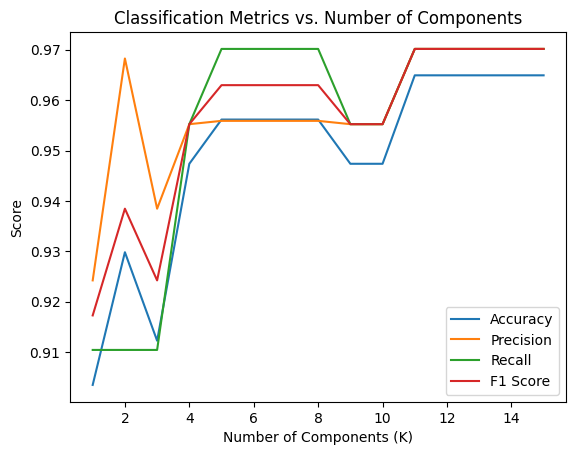

In [49]:
# Select N values from 1 to 15
N = [i for i in range(1, 16)]

# Initialize lists to store metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []

for K in N:
    # Perform PCA
    pca = PCA(n_components=K)
    principalDf = pd.DataFrame(data=pca.fit_transform(X3))

    # Split the data into training and validation sets
    x3_train, x3_test, y3_train, y3_test = train_test_split(principalDf.values, Y, train_size=0.8, test_size=0.2,
                                                            random_state=0)

    # Perform logistic regression
    classifier = LogisticRegression(random_state=0)
    classifier.fit(x3_train, y3_train)

    # Make predictions and find confusion matrix
    y3_pred = classifier.predict(x3_test)
    cnf_matrix_3 = confusion_matrix(y3_test, y3_pred)

    # Find accuracy, precision, recall, and F1 score
    accuracy1 = metrics.accuracy_score(y3_test, y3_pred)
    precision1 = metrics.precision_score(y3_test, y3_pred)
    recall1 = metrics.recall_score(y3_test, y3_pred)
    f1_score1 = metrics.f1_score(y3_test, y3_pred)

    # Append metrics to respective lists
    accuracy_list.append(accuracy1)
    precision_list.append(precision1)
    recall_list.append(recall1)
    f1_score_list.append(f1_score1)

    print(f"K = {K}:")
    print("Accuracy:", accuracy1)
    print("Precision:", precision1)
    print("Recall:", recall1)
    print("F1 Score:", f1_score1)
    print('\n')

# Plotting the metrics
plt.plot(N, accuracy_list, label='Accuracy')
plt.plot(N, precision_list, label='Precision')
plt.plot(N, recall_list, label='Recall')
plt.plot(N, f1_score_list, label='F1 Score')

plt.xlabel('Number of Components (K)')
plt.ylabel('Score')
plt.title('Classification Metrics vs. Number of Components')
plt.legend()
plt.show()


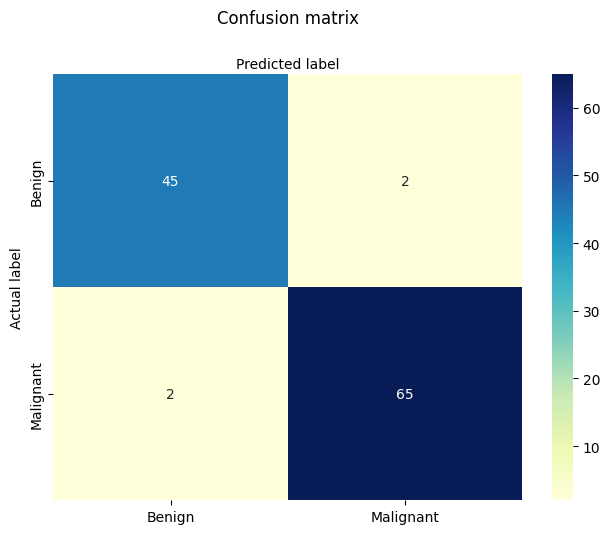

In [50]:
# Find confusion matrix
confusion_matrix_3b = confusion_matrix(y3_test, y3_pred)

# Plot confusion matrix
plot_confusion_matrix(confusion_matrix=confusion_matrix_3b, neg_label='Benign', pos_label='Malignant')

Problem 4

In [51]:
X4 = StandardScaler().fit_transform(X)

K = 1:
Accuracy: 0.9035087719298246
Precision: 0.9242424242424242
Recall: 0.9104477611940298
F1 Score: 0.9172932330827067


K = 2:
Accuracy: 0.9122807017543859
Precision: 0.9253731343283582
Recall: 0.9253731343283582
F1 Score: 0.9253731343283582


K = 3:
Accuracy: 0.9035087719298246
Precision: 0.9242424242424242
Recall: 0.9104477611940298
F1 Score: 0.9172932330827067


K = 4:
Accuracy: 0.9035087719298246
Precision: 0.9242424242424242
Recall: 0.9104477611940298
F1 Score: 0.9172932330827067


K = 5:
Accuracy: 0.9210526315789473
Precision: 0.9142857142857143
Recall: 0.9552238805970149
F1 Score: 0.9343065693430657


K = 6:
Accuracy: 0.9210526315789473
Precision: 0.9142857142857143
Recall: 0.9552238805970149
F1 Score: 0.9343065693430657


K = 7:
Accuracy: 0.9122807017543859
Precision: 0.9130434782608695
Recall: 0.9402985074626866
F1 Score: 0.9264705882352942


K = 8:
Accuracy: 0.9122807017543859
Precision: 0.9130434782608695
Recall: 0.9402985074626866
F1 Score: 0.9264705882352942


K = 9:
A

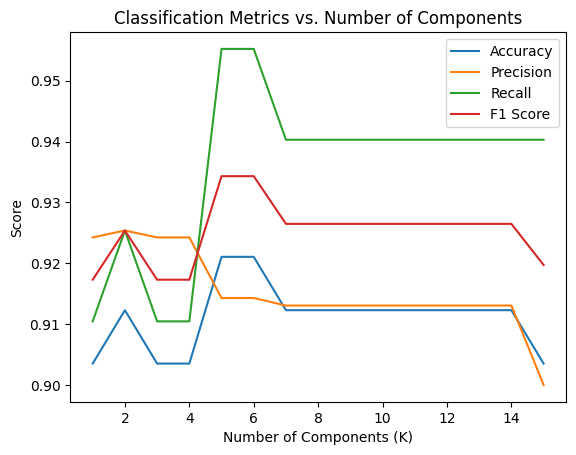

In [52]:
# Select N values from 1 to 15
N = [i for i in range(1, 16)]

# Initialize lists to store metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []

for K in N:
    # Perform PCA
    pca = PCA(n_components=K)
    principalDf = pd.DataFrame(data=pca.fit_transform(X4))

    # Split the data into training and validation sets
    x4_train, x4_test, y4_train, y4_test = train_test_split(principalDf.values, Y, train_size=0.8, test_size=0.2,
                                                            random_state=0)

    # Perform Gaussian Naive Bayes classification
    classifier = GaussianNB()
    classifier.fit(x4_train, y4_train)

    # Make predictions and find confusion matrix
    y4_pred = classifier.predict(x4_test)
    cnf_matrix_4 = confusion_matrix(y4_test, y4_pred)

    # Find accuracy, precision, recall, and F1 score
    accuracy = metrics.accuracy_score(y4_test, y4_pred)
    precision = metrics.precision_score(y4_test, y4_pred)
    recall = metrics.recall_score(y4_test, y4_pred)
    f1_score = metrics.f1_score(y4_test, y4_pred)

    # Append metrics to respective lists
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_score_list.append(f1_score)

    print(f"K = {K}:")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1_score)
    print('\n')

# Plotting the metrics
plt.plot(N, accuracy_list, label='Accuracy')
plt.plot(N, precision_list, label='Precision')
plt.plot(N, recall_list, label='Recall')
plt.plot(N, f1_score_list, label='F1 Score')

plt.xlabel('Number of Components (K)')
plt.ylabel('Score')
plt.title('Classification Metrics vs. Number of Components')
plt.legend()
plt.show()


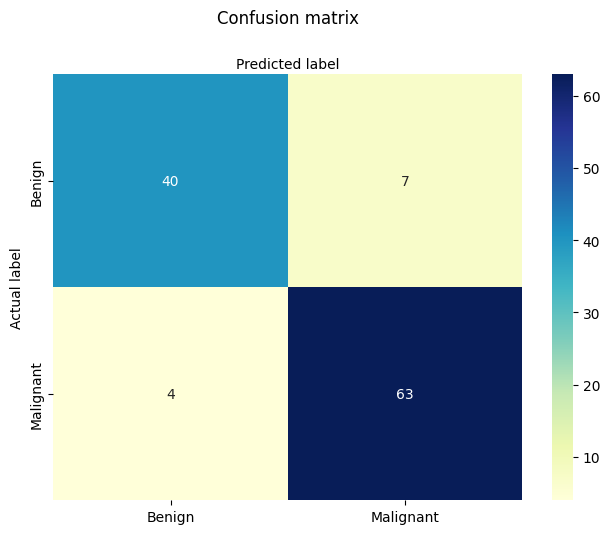

In [53]:
# Problem 4b
# Find confusion matrix
confusion_matrix_4b = confusion_matrix(y4_test, y4_pred)

# Plot confusion matrix
plot_confusion_matrix(confusion_matrix=confusion_matrix_4b, neg_label='Benign', pos_label='Malignant')